In [3]:
# Converting images to array
import numpy as np
from keras.preprocessing import image
import json

path = './test_images/mtest1.png'
img = image.load_img(path, target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

data = json.dumps({"signature_name": "serving_default", "instances": images.tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 0], [255.0, 255.0, 255.0], [255.0, 255.0, 255.0]]]]}


0.0
./test_images/mtest1.png is a minions


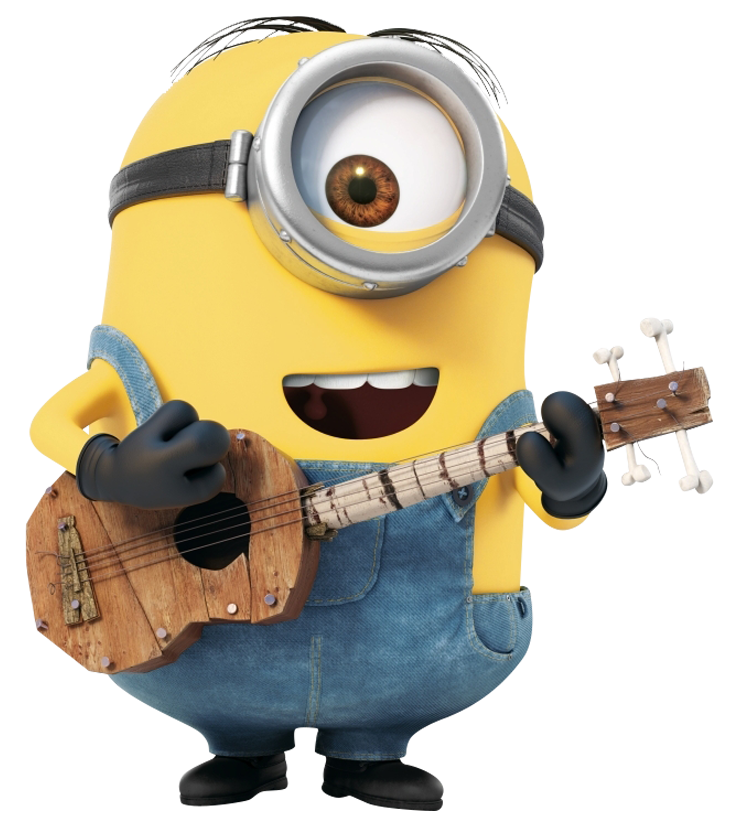

In [5]:
# Sending request to API
import requests
from IPython.display import display, Image
headers = {"content-type": "application/json"}
json_response = requests.post('http://minions-spongebob-class-api.southeastasia.azurecontainer.io:8501/v1/models/model:predict', data=data, headers=headers)
predictions = json.loads(json_response.text)['predictions']

prediction = predictions[0][0]
print(prediction)
if prediction>0.5:
    print(path + " is a spongebob")
else:
    print(path +" is a minions")

display(Image(filename='./test_images/mtest1.png'))